In [4]:
import sys
import torch
from dcgan import Generator, Discriminator
sys.path.append("/data/bitt/wzq/wzq/GANs/")
from utils import make_image

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
model = Generator().to(device)
model.eval()  # 存在bn层，启动eval的模式对bn的权值固定用训练好的，不然会根据当前batch来进行计算，会出现很大的偏差
model.load_state_dict(torch.load("checkpoints/generator_best.pt"))

In [7]:
print(model)

Generator(
  (fc1): Linear(in_features=100, out_features=12544, bias=True)
  (conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
)


In [8]:
z = torch.randn(64, 100).to(device)

In [9]:
with torch.no_grad():
    output = model(z).view(-1, 1, 28, 28)
    img = (output + 1.0) / 2.0

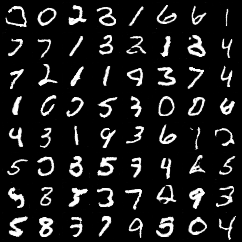

In [10]:
make_image(img)

In [11]:
from torchsummary import summary

In [13]:
summary(model, input_size=(1, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 1, 12544]       1,266,944
   ConvTranspose2d-2          [-1, 128, 14, 14]         295,040
       BatchNorm2d-3          [-1, 128, 14, 14]             256
   ConvTranspose2d-4           [-1, 64, 14, 14]          73,792
       BatchNorm2d-5           [-1, 64, 14, 14]             128
   ConvTranspose2d-6            [-1, 1, 28, 28]             577
Total params: 1,636,737
Trainable params: 1,636,737
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.68
Params size (MB): 6.24
Estimated Total Size (MB): 6.92
----------------------------------------------------------------
